# Introduction
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

## importing necessary libraries.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
!pip install xgboost

### Loading train dataset

In [14]:
df1 = pd.read_csv('blackFriday_train.csv')

print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Loading test dataset

In [15]:
df2 = pd.read_csv('blackFriday_test.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [16]:
print(df2.shape) # checking the number of rows and columns in the test dataset

(233599, 11)


### visualizing fist 5 rows of the dataset.


In [17]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Describing the basic statistics of the data.

In [18]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Dropping unnecessary fields from the dataset.


In [19]:
df1.drop(['User_ID'],axis=1,inplace=True)

In [20]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Converting categorical data into integer ones by using mapping function.

In [21]:
df1['Gender']=df1['Gender'].map({'F':0, 'M':1})
df1['Gender'].head(10) # checking the column after tranasformation

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

### visualizing the unique values of the particular field.

In [22]:
df1.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

### Mapping the range variable into integer ones.

In [23]:
df1['Age']=df1['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [24]:
df1.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [25]:
df1.City_Category.unique() # checking the unique values in the City_Category column

array(['A', 'C', 'B'], dtype=object)

### creating dummies for the categorical data.

In [26]:
city = pd.get_dummies(df1['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


### Concatinaing dummy variables with original dataset.

In [27]:
df1 = pd.concat([df1,city],axis=1)
df1.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


### visualizing last 5 rows of the dataset.

In [28]:
df1.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550063,P00372445,1,6,13,B,1,1,20,NaN,NaN,368,1,0
550064,P00375436,0,3,1,C,3,0,20,NaN,NaN,371,0,1
550065,P00375436,0,3,15,B,4+,1,20,NaN,NaN,137,1,0
550066,P00375436,0,7,1,C,2,0,20,NaN,NaN,365,0,1
550067,P00371644,0,5,0,B,4+,1,20,NaN,NaN,490,1,0


### Checking for columnwise null values 

In [29]:
df1.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

### visualizing unique values of fields which contains NAN values for different columns.

In [30]:
df1.Product_Category_1.unique()  

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [31]:
df1.Product_Category_2.unique()  

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [32]:
df1.Product_Category_3.unique()  

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Value count of each variable.

In [33]:
df1.Product_Category_2.value_counts()  

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

### Finding mode of the field.

In [34]:
df1.Product_Category_1.mode()  

0    5
dtype: int64

### Renaming the columns.

In [35]:
df1.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

### Looking at the column names after the rename operation.

In [36]:
df1.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

### filling the nan values with the mode.

In [37]:
df1['cat2'] = df1['cat2'].fillna(df1['cat2'].mode()[0])

In [38]:
df1.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,NaN,7969,0,1


In [39]:
df1.cat2.mode() # checking the mode after transformation

0    8.0
dtype: float64

In [40]:
df1['cat3'] = df1['cat3'].fillna(df1['cat3'].mode()[0])

In [41]:
df1.isnull().sum() # checking the dataframe again for null values. cat1, cat2 and cat3 no more have null values

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

### Filling the nan values with the mean of the column.

In [42]:
df1['Purchase'] = df1['Purchase'].fillna(df1['Purchase'].mean())

In [43]:
df1.head() # looking at the datset after filling the null value

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969,0,1


### Rechecking the null values.

In [44]:
df1.isnull().sum() # all the null values have been removed

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

### Dropping the Column.

In [45]:
df1.drop('City_Category',axis=1, inplace=True) 

In [46]:
df1.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969,0,1


In [47]:
df1.Stay_In_Current_City_Years.unique() # checking the unique values in the column Stay_In_Current_City_Years

array(['2', '4+', '3', '1', '0'], dtype=object)

### Replacing the value by using str method.

In [48]:
df1['Stay_In_Current_City_Years']=df1.Stay_In_Current_City_Years.str.replace('+','') # replacing + with blank

In [49]:
df1.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969,0,1


### Checking the allover info of the dataset.

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   cat1                        550068 non-null  int64  
 7   cat2                        550068 non-null  float64
 8   cat3                        550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage: 43.0+ MB


### converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [51]:
df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].astype(int)
df1['B']=df1['B'].astype(int)
df1['C']=df1['C'].astype(int)

### Rechecking the datatypes of the dataset.

In [52]:
df1.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                        int64
B                               int32
C                               int32
dtype: object

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   cat1                        550068 non-null  int64  
 7   cat2                        550068 non-null  float64
 8   cat3                        550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 44.1+ MB


### Creating a checkpoint.

In [54]:
df_i = df1.copy()

# Dropping the unnecessary field.
df_i.drop('Product_ID',axis=1,inplace=True)

In [55]:
df_i.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
5,1,3,15,3,0,1,2.0,16.0,15227,0,0
6,1,5,7,2,1,1,8.0,17.0,19215,1,0
7,1,5,7,2,1,1,15.0,16.0,15854,1,0
8,1,5,7,2,1,1,16.0,16.0,15686,1,0
9,1,3,20,1,1,8,8.0,16.0,7871,0,0


### Visualizing Age Vs Purchased.

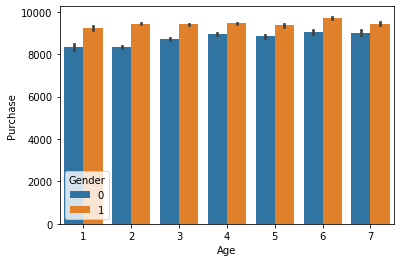

In [56]:
sns.barplot('Age','Purchase',hue='Gender',data=df_i)

Purchasing of goods of each range of age are almost equal.
We can conclude that the percentage of purchasing goods of men over women is higher.

### Visualizing Occupation Vs Purchased.

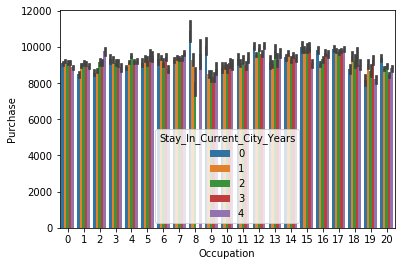

In [57]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df_i)

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

### Visualizing Product_category1 Vs Purchased.

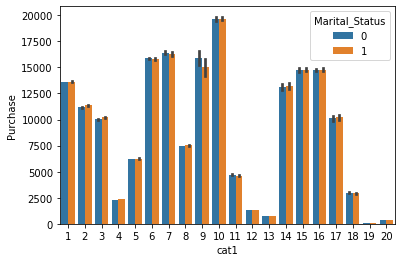

In [58]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category2 Vs Purchased.

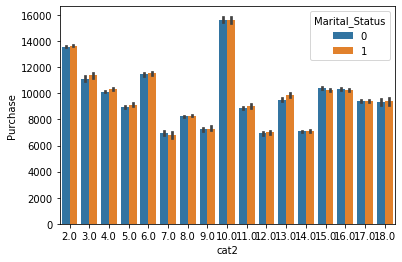

In [59]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category3 Vs Purchased.

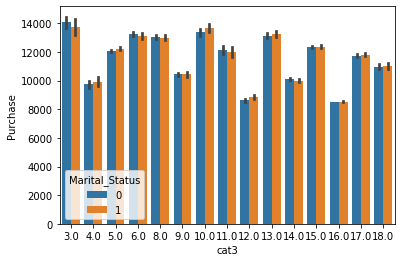

In [60]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df_i)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.
product category3 is much more purchased by people than product category2 and product category1 

In [61]:
X = df_i.drop('Purchase',axis=1) # dropping the Purchase column to create features
y = df_i.Purchase  # selecting the Purchase column to create labels
print(X.shape)
print(y.shape)

(550068, 10)
(550068,)


In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(385047, 10)
(385047,)
(165021, 10)
(165021,)


In [63]:
# Feature Scaling So that data in all the columns are to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [64]:
X_train

array([[ 0.57162531, -0.36693322,  1.21508142, ...,  0.36881237,
        -0.85069198, -0.67262255],
       [ 0.57162531, -0.36693322, -1.08479527, ...,  0.36881237,
         1.17551361, -0.67262255],
       [ 0.57162531, -1.1051074 , -0.1648446 , ...,  0.36881237,
        -0.85069198, -0.67262255],
       ...,
       [-1.74939769, -1.1051074 , -1.08479527, ...,  0.36881237,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.62481993, ...,  0.36881237,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.93147016, ...,  0.36881237,
        -0.85069198, -0.67262255]])

In [65]:
X_test

array([[ 0.57477292,  1.85405271,  1.67376786, ...,  0.36874617,
        -0.85312593,  1.49025657],
       [-1.73981753,  0.37382623,  0.44752121, ...,  0.36874617,
         1.1721599 , -0.67102539],
       [-1.73981753,  0.37382623, -1.23856793, ...,  0.36874617,
        -0.85312593, -0.67102539],
       ...,
       [ 0.57477292, -1.10640025,  1.21392536, ...,  0.36874617,
        -0.85312593,  1.49025657],
       [ 0.57477292, -1.10640025, -0.6254446 , ...,  0.00427372,
         1.1721599 , -0.67102539],
       [ 0.57477292, -1.10640025, -0.6254446 , ...,  0.36874617,
         1.1721599 , -0.67102539]])

Now we have features for both training and testing. The data can now be converted to a dataframe, if necessary, and can be fed to a machine learning model. 

In [77]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE 4684.469310418447
R2 Score: 0.1292749344714368


In [78]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE 4714.2551950773495
R2 Score: 0.11816683721036392


In [79]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE 4684.475373673914
R2 Score: 0.12927268045648632


In [74]:
RandomForestModel = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
RandomForestModel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [67]:
y_pred = RandomForestModel.predict(X_test)
y_pred

array([14156.57238889, 14583.02571058,  6871.55523485, ...,
       13698.85075   , 14486.1783869 ,  6205.83294882])

In [68]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse
# 3236.905019136034 n_estimator=500
# 3238.146631191207 n_estimator=200)

3051.5349971294413

In [71]:
# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
# 0.40845714330997 for n_estimator=500
#0.4080032470784235 n=200

R2 Score: 0.6305148734858781


In [72]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE 4714.2551950773495
R2 Score: 0.11816683721036392


In [74]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE 2945.951954182634
R2 Score: 0.655640895540029


In [77]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

## Hyperparameter Tuning

In [79]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20]
}

In [80]:
grid= GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, verbose=3)

In [81]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] learning_rate=1, max_depth=5, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=1, max_depth=5, n_estimators=50, score=0.665, total=  12.2s
[CV] learning_rate=1, max_depth=5, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV]  learning_rate=1, max_depth=5, n_estimators=50, score=0.666, total=  11.9s
[CV] learning_rate=1, max_depth=5, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.1s remaining:    0.0s


[CV]  learning_rate=1, max_depth=5, n_estimators=50, score=0.666, total=  11.1s
[CV] learning_rate=1, max_depth=5, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=5, n_estimators=50, score=0.662, total=  12.7s
[CV] learning_rate=1, max_depth=5, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=5, n_estimators=50, score=0.672, total=  12.7s
[CV] learning_rate=1, max_depth=5, n_estimators=100 ..................
[CV]  learning_rate=1, max_depth=5, n_estimators=100, score=0.667, total=  25.8s
[CV] learning_rate=1, max_depth=5, n_estimators=100 ..................
[CV]  learning_rate=1, max_depth=5, n_estimators=100, score=0.668, total=  25.8s
[CV] learning_rate=1, max_depth=5, n_estimators=100 ..................
[CV]  learning_rate=1, max_depth=5, n_estimators=100, score=0.667, total=  28.6s
[CV] learning_rate=1, max_depth=5, n_estimators=100 ..................
[CV]  learning_rate=1, max_depth=5, n_estimators=100, score=0.663, total=  27.0s
[CV] learn

[CV]  learning_rate=0.5, max_depth=5, n_estimators=200, score=0.670, total= 1.3min
[CV] learning_rate=0.5, max_depth=5, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200, score=0.669, total= 1.8min
[CV] learning_rate=0.5, max_depth=5, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200, score=0.667, total= 1.4min
[CV] learning_rate=0.5, max_depth=5, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200, score=0.677, total= 1.3min
[CV] learning_rate=0.5, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.663, total=  30.0s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.664, total=  28.3s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50 ................
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.663, total= 

[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, score=0.673, total= 1.0min
[CV] learning_rate=0.1, max_depth=10, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, score=0.674, total= 1.0min
[CV] learning_rate=0.1, max_depth=10, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, score=0.674, total=  59.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, score=0.670, total= 1.0min
[CV] learning_rate=0.1, max_depth=10, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, score=0.680, total= 1.0min
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, score=0.672, total= 2.1min
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, score=0.673, 

[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, score=0.587, total= 2.3min
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............
[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, score=0.591, total= 2.0min
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=-0.837, total=  51.6s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=-0.822, total=  58.3s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=-0.830, total=  54.9s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=-0.826, total=  53.1s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=-

[CV]  learning_rate=0.001, max_depth=20, n_estimators=100, score=-2.650, total= 1.5min
[CV] learning_rate=0.001, max_depth=20, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=20, n_estimators=100, score=-2.669, total= 1.5min
[CV] learning_rate=0.001, max_depth=20, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=20, n_estimators=100, score=-2.662, total= 1.5min
[CV] learning_rate=0.001, max_depth=20, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=20, n_estimators=100, score=-2.648, total= 1.4min
[CV] learning_rate=0.001, max_depth=20, n_estimators=200 .............
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200, score=-2.078, total= 3.0min
[CV] learning_rate=0.001, max_depth=20, n_estimators=200 .............
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200, score=-2.051, total= 3.1min
[CV] learning_rate=0.001, max_depth=20, n_estimators=200 .............
[CV]  learning_rate=0.001, max_depth=20, n_estimator

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 387.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=Non

In [83]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [89]:
import numpy as np
new_model=XGBRegressor(learning_rate= 0.1, max_depth= 10, n_estimators= 100, n_jobs = -1)
new_model.fit(X_train, y_train)
# make prediction
y_pred = new_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
#RMSE 3053.7528460968692
#R2 Score: 0.4735052164850304 with only max_depth=5, learningrate=1, n_estimator=50

RMSE 2874.747957583031
R2 Score: 0.672086120962142


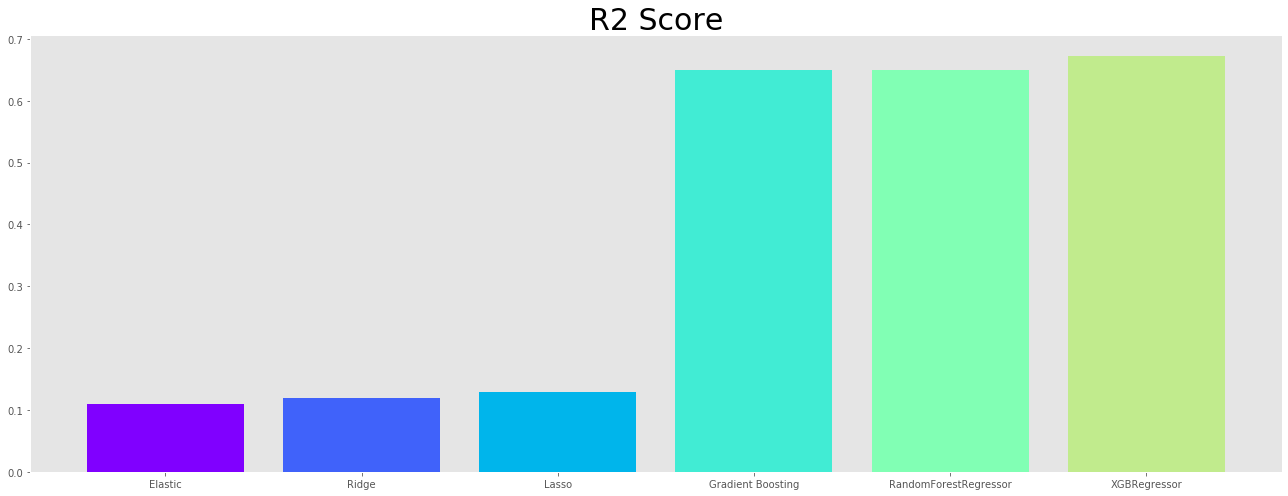

In [72]:
r2_score = np.array([0.12, 0.11, 0.129, 0.65, 0.65, 0.672])
labels = np.array(['Ridge', 'Elastic', 'Lasso','Gradient Boosting','RandomForestRegressor','XGBRegressor'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

XGBRegreesor gives highest R2 score after hyperparameter tuning